In [4]:
#From http://www.kdnuggets.com/2017/03/medical-image-analysis-deep-learning.html
import numpy as np
import cv2
import matplotlib.pyplot as plt

import dicom as pdicom
import os
import glob

import pandas as pd
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib inline

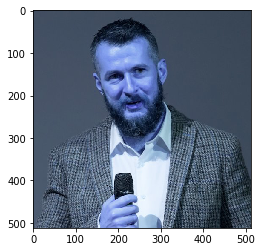

In [5]:
img = cv2.imread('/Users/puntofisso/Desktop/me2.jpg')
plt.imshow(img)
plt.show()

[[139  86 174 174]]


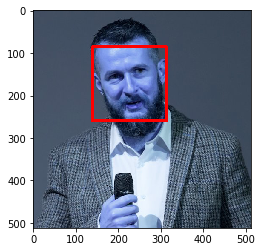

In [6]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = gray[y:y+h, x:x+w]
plt.imshow(img)
plt.show()

In [7]:
INPUT_FOLDER = 'data/sample_images/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()
# patients should now contain all the images

In [8]:
lstFilesDCM = [] #empty list of files
def load_scan2(path):
    for dirName, subdirList, fileList in os.walk(path):
        for filename in fileList:
            if ".dcm" in filename.lower():
                lstFilesDCM.append(os.path.join(dirName,filename))
    return lstFilesDCM

first_patient = load_scan2(INPUT_FOLDER)

In [23]:
# Viewing DICOM Images
# pick up file
RefDs = pdicom.read_file(lstFilesDCM[0])

# if you print this, you'll see data about the patient

# Load dimensions based on num rows, cols, and slices along Z axis
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

#Load spacing values in mm#
# TODO BUG in theory, here = float(RefDs.SliceThickness), but RefDS doesn't seem to have a slicethickness...
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), 0.1)
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

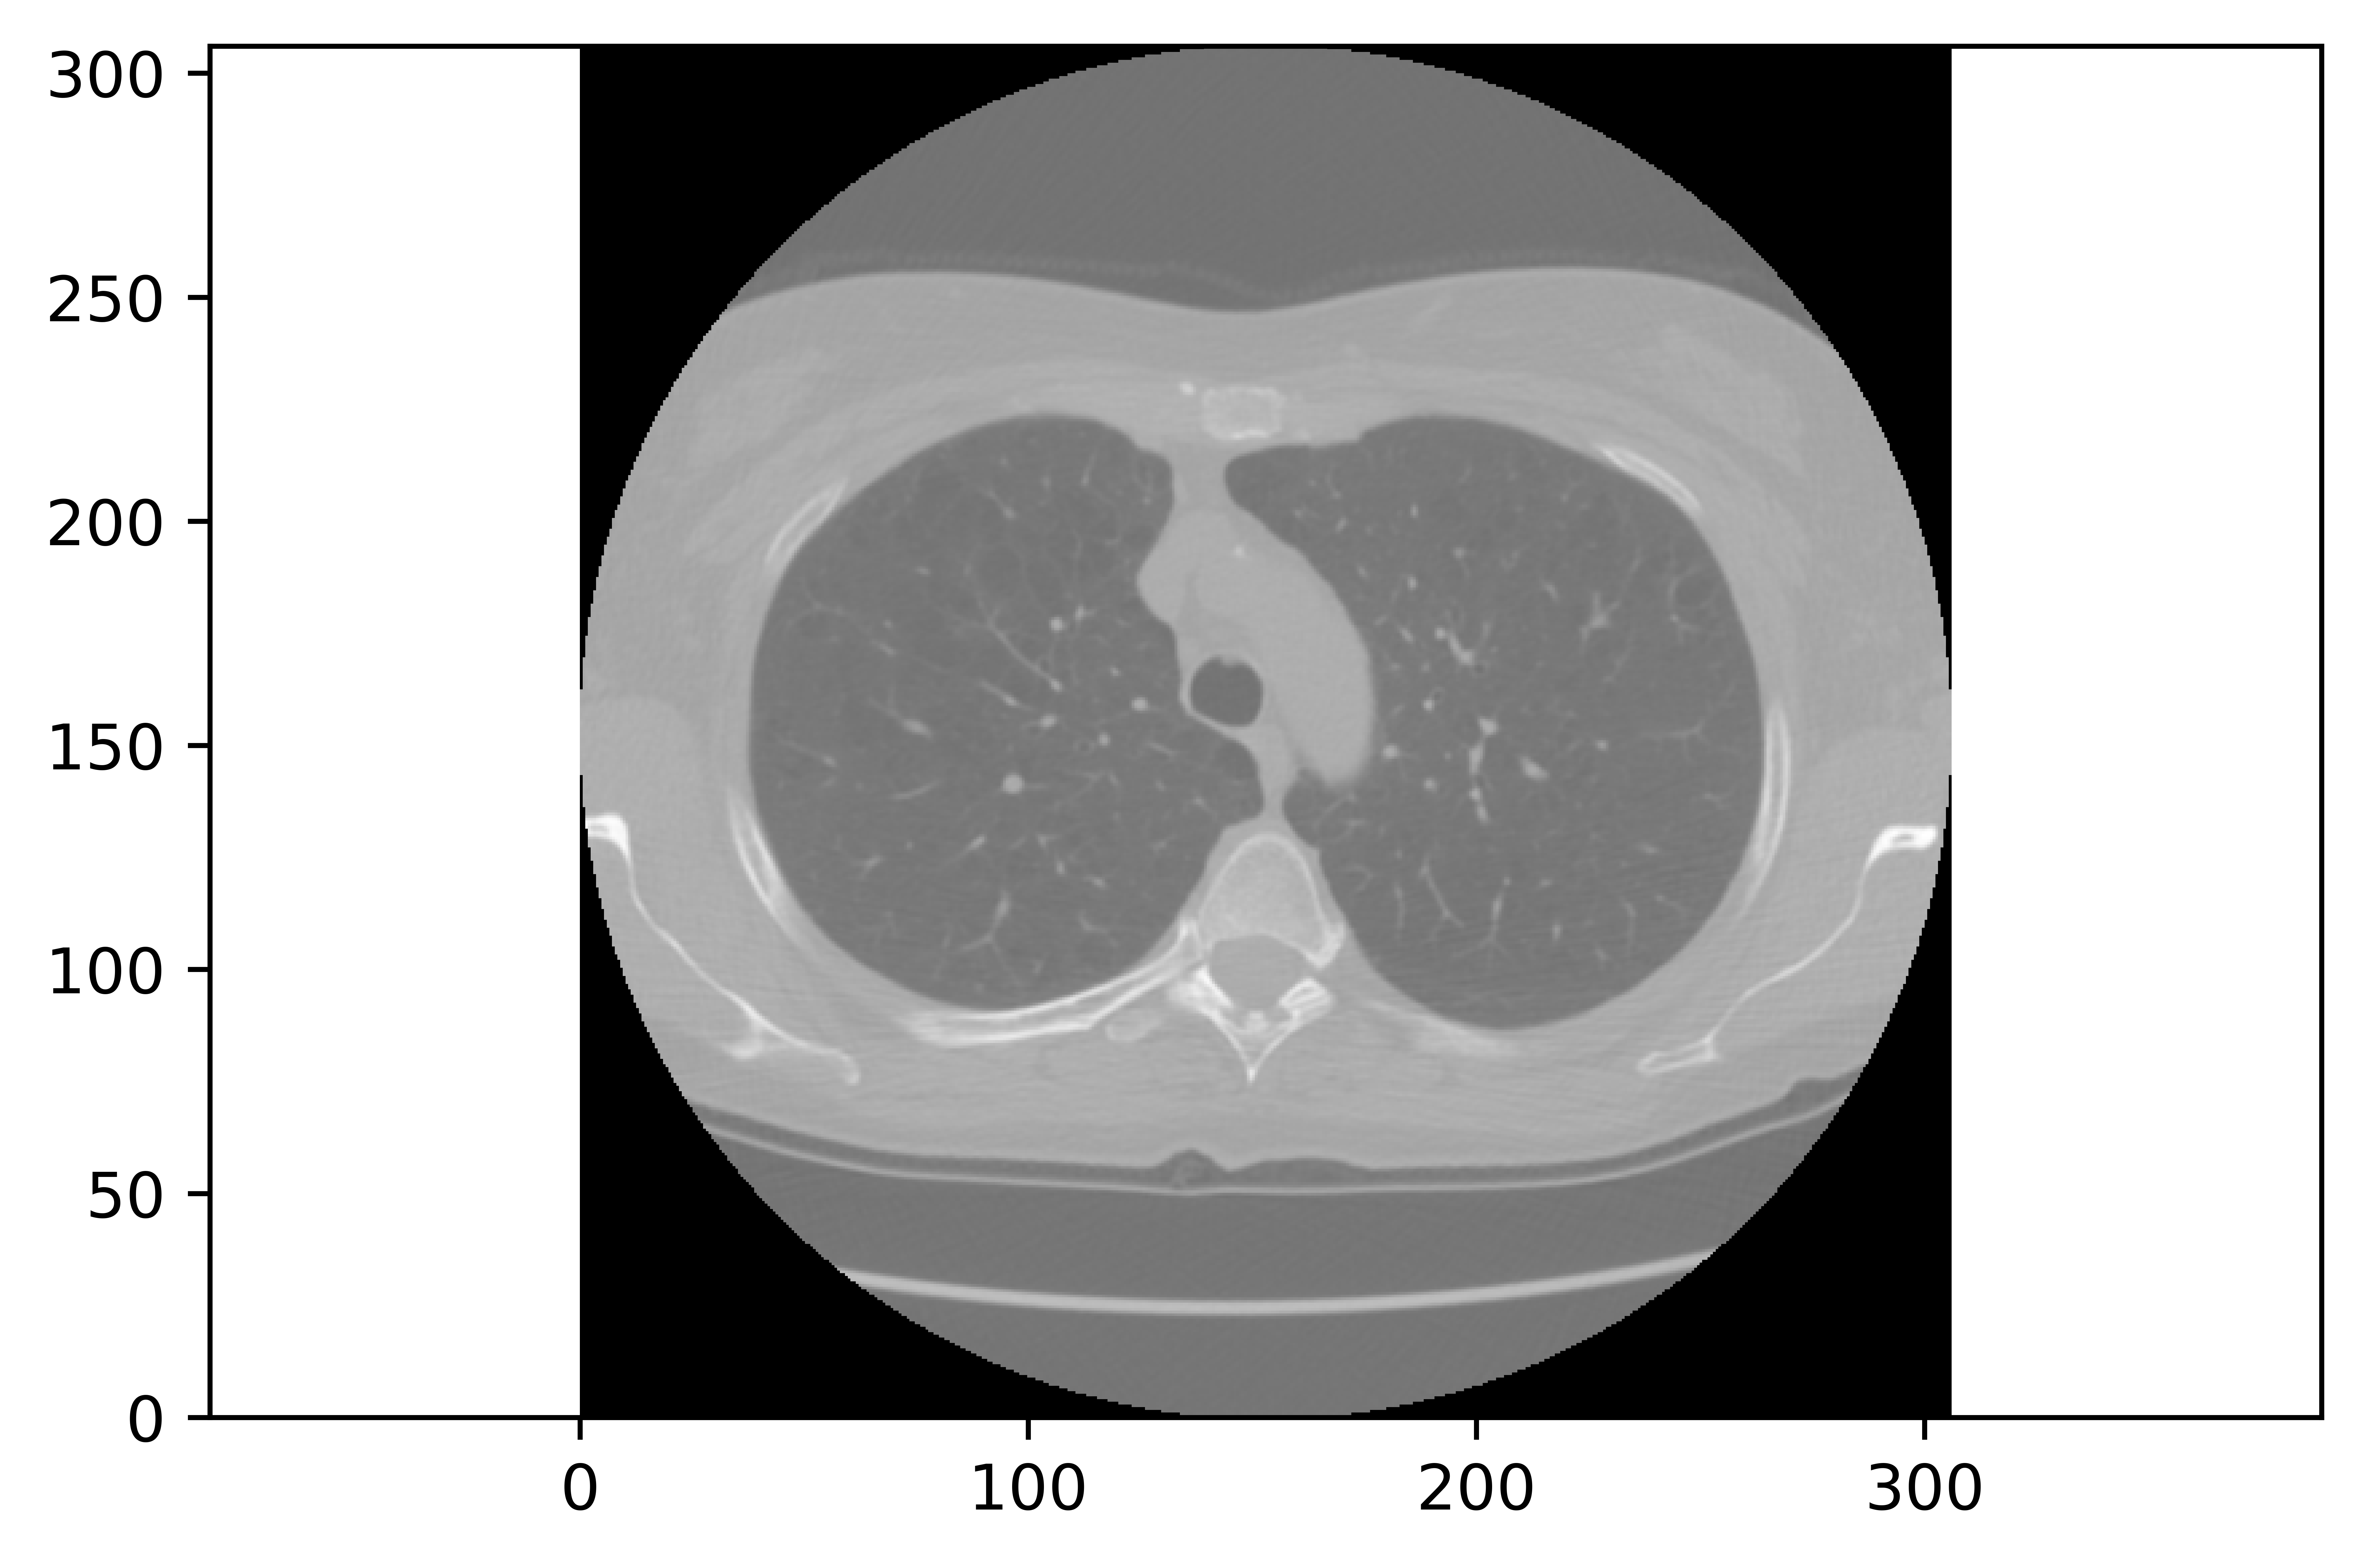

In [24]:
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

#loop trough files and fill matrix
for filenameDCM in lstFilesDCM:
    ds = pdicom.read_file(filenameDCM)
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array
plt.figure(dpi=1600)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 120]))